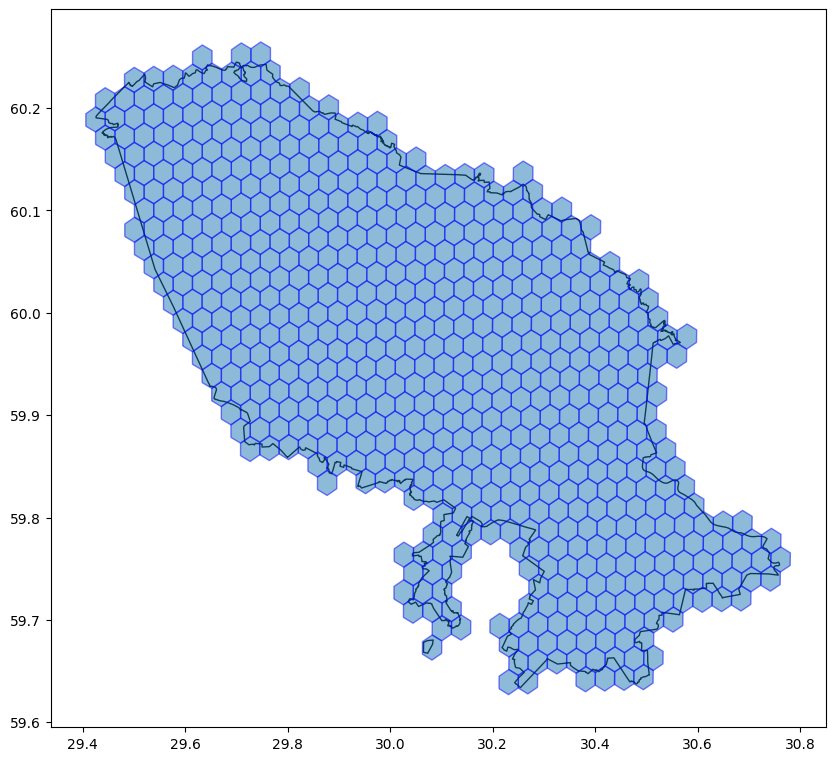

In [5]:
import osmnx as ox
import geopandas as gpd
import h3
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# 1. Загружаем границы Волгоградской области
place_name = "Saint Petersburg, Russia"

area = ox.geocode_to_gdf(place_name)

# Преобразуем границы в гео-координаты
geometry = area['geometry'].iloc[0]  # Извлекаем геометрию области

# 2. Определяем разрешение для гексагональной сетки
resolution = 7

# 3. Определяем bounding box для области
minx, miny, maxx, maxy = geometry.bounds

# 4. Проходим по всей территории внутри bounding box и создаем гексагоны
hexagons = set()
step_size = 0.01  # Шаг сетки (чем меньше, тем больше гексагонов)
lat_range = np.arange(miny, maxy, step_size)
lon_range = np.arange(minx, maxx, step_size)

for lat in lat_range:
    for lon in lon_range:
        hex_id = h3.geo_to_h3(lat, lon, resolution)
        hexagons.add(hex_id)

# 5. Преобразуем H3 гексагоны обратно в полигоны и фильтруем их по границам Волгоградской области
def h3_to_polygon(h):
    boundary = h3.h3_to_geo_boundary(h, geo_json=True)
    return Polygon(boundary)

# Преобразуем гексагоны в полигоны
hex_polygons = [h3_to_polygon(h) for h in hexagons]
gdf_hex = gpd.GeoDataFrame({'geometry': hex_polygons}, crs="EPSG:4326")

# Оставляем только те гексагоны, которые пересекаются с границами области
gdf_hex = gdf_hex[gdf_hex.intersects(geometry)]

# 6. Визуализация гексагональной сетки и границ Волгоградской области
fig, ax = plt.subplots(figsize=(10, 10))
area.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
gdf_hex.plot(ax=ax, edgecolor="blue", alpha=0.5)

plt.show()

NameError: name 'gdf_hex' is not defined

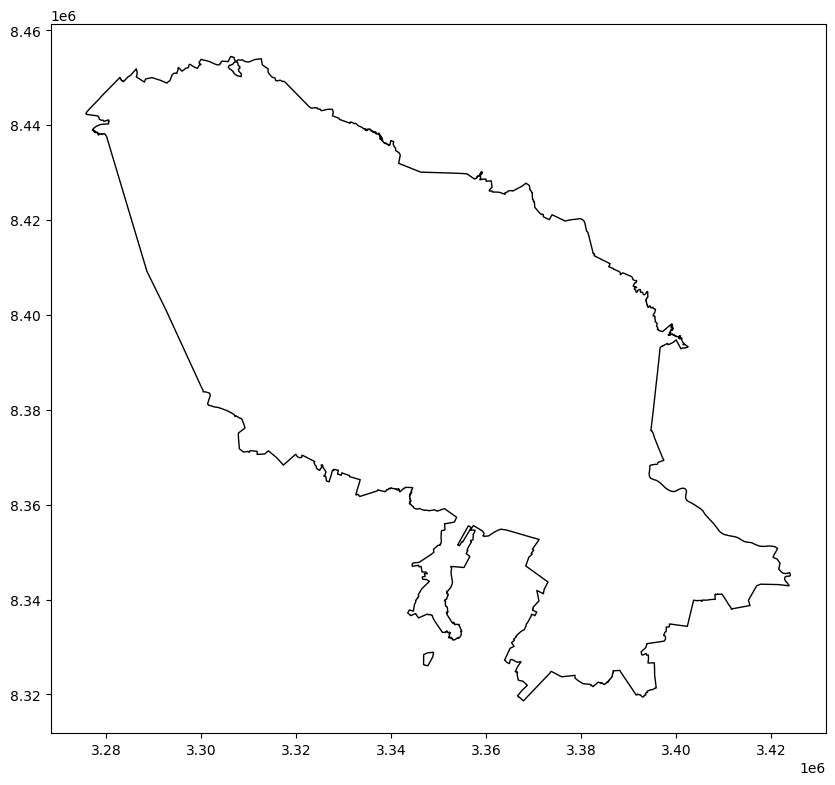

In [ ]:
import contextily as ctx
fig, ax = plt.subplots(figsize=(10, 10))

# Отрисовываем границы области
area.to_crs(epsg=3857).plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)

# Отрисовываем гексагональную сетку
gdf_hex.to_crs(epsg=3857).plot(ax=ax, edgecolor="blue", alpha=0.5)

# Добавляем подложку "positron"
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Убираем оси
ax.set_axis_off()

# Отображаем карту
plt.show()

In [6]:
gdf_hex = gdf_hex.reset_index(drop=True)
gdf_hex['id'] = gdf_hex.index
gdf_hex

,geometry,id
0,"POLYGON ((30.25756 60.03797, 30.27642 60.03224...",0
1,"POLYGON ((29.99014 59.84859, 30.00889 59.84288...",1
2,"POLYGON ((29.70821 59.86039, 29.72697 59.85473...",2
3,"POLYGON ((30.36823 59.89318, 30.38701 59.88741...",3
4,"POLYGON ((29.84069 59.99196, 29.85952 59.98629...",4
...,...,...
611,"POLYGON ((30.00787 59.75716, 30.02658 59.75144...",611
612,"POLYGON ((30.06399 59.73999, 30.08269 59.73426...",612
613,"POLYGON ((29.67125 60.11609, 29.69015 60.11046...",613
614,"POLYGON ((29.72764 60.02588, 29.74649 60.02024...",614


In [ ]:
territiry = gdf_hex[gdf_hex['id'] == 6] # указать id выбранной вами территории
territiry

,geometry,id
6,"POLYGON ((44.31495 50.67770, 44.33973 50.64707...",6


In [7]:
gdf_hex.to_file('spb_hex.geojson', driver='GeoJSON') 